## Example Problem - Linstedt Poincare Procedure

In this problem, we will apply Lindstedt's method to $\ddot{x} + \epsilon x \dot{x} + x = 0$, for $0 < \epsilon << 1$, where $x(0) = a_0$, and $\dot{x}(0) = 0$. We will show that the frequency-amplitude relation for periodic solutions is given by $\omega = 1 - \frac{1}{24}a_0^2 \epsilon^2 + O(\epsilon^3)$.

In [1]:
from sympy import *

In [2]:
x = Function('x')
x0 = Function('x_0')
x1 = Function('x_1')
x2 = Function('x_2')
t = Symbol('t')
eps = Symbol('epsilon')
w1 = Symbol('w_1')
w2 = Symbol('w_2')
w = Symbol('w')
a0 = Symbol('a_0')

Note that to a second order expansion in the frequency due to Lindstedt method, $\tau = \omega t$, with $\omega = 1 + \epsilon \omega_1  + \epsilon^2 \omega_2$. In addtion, we use the expansion in the solution, $x = x_0(t) + \epsilon  x_1(t) + \epsilon^2  x_2(t)$, and substitute both into the differential equation we are trying to solve.

In [3]:
w = 1 + eps * w1 + eps**2 * w2
x = x0(t) + eps * x1(t) + eps**2 * x2(t)
expr = w**2 * x.diff(t,t) + w*eps*x*x.diff(t) + x
display(expr)

epsilon**2*x_2(t) + epsilon*(epsilon**2*w_2 + epsilon*w_1 + 1)*(epsilon**2*x_2(t) + epsilon*x_1(t) + x_0(t))*(epsilon**2*Derivative(x_2(t), t) + epsilon*Derivative(x_1(t), t) + Derivative(x_0(t), t)) + epsilon*x_1(t) + (epsilon**2*w_2 + epsilon*w_1 + 1)**2*(epsilon**2*Derivative(x_2(t), (t, 2)) + epsilon*Derivative(x_1(t), (t, 2)) + Derivative(x_0(t), (t, 2))) + x_0(t)

Next, we expand and collect like terms of $\epsilon$.

In [4]:
expr = expand(expr)
expr = collect(expr,eps)
display(expr)

epsilon**7*w_2*x_2(t)*Derivative(x_2(t), t) + epsilon**6*(w_1*x_2(t)*Derivative(x_2(t), t) + w_2**2*Derivative(x_2(t), (t, 2)) + w_2*x_1(t)*Derivative(x_2(t), t) + w_2*x_2(t)*Derivative(x_1(t), t)) + epsilon**5*(2*w_1*w_2*Derivative(x_2(t), (t, 2)) + w_1*x_1(t)*Derivative(x_2(t), t) + w_1*x_2(t)*Derivative(x_1(t), t) + w_2**2*Derivative(x_1(t), (t, 2)) + w_2*x_0(t)*Derivative(x_2(t), t) + w_2*x_1(t)*Derivative(x_1(t), t) + w_2*x_2(t)*Derivative(x_0(t), t) + x_2(t)*Derivative(x_2(t), t)) + epsilon**4*(w_1**2*Derivative(x_2(t), (t, 2)) + 2*w_1*w_2*Derivative(x_1(t), (t, 2)) + w_1*x_0(t)*Derivative(x_2(t), t) + w_1*x_1(t)*Derivative(x_1(t), t) + w_1*x_2(t)*Derivative(x_0(t), t) + w_2**2*Derivative(x_0(t), (t, 2)) + w_2*x_0(t)*Derivative(x_1(t), t) + w_2*x_1(t)*Derivative(x_0(t), t) + 2*w_2*Derivative(x_2(t), (t, 2)) + x_1(t)*Derivative(x_2(t), t) + x_2(t)*Derivative(x_1(t), t)) + epsilon**3*(w_1**2*Derivative(x_1(t), (t, 2)) + 2*w_1*w_2*Derivative(x_0(t), (t, 2)) + w_1*x_0(t)*Derivative(x

We can clean this up a bit more. We can create a list of the equations! Let's do this for terms 0, 1, 2.

In [5]:
eqLHS = collect(expr,eps,evaluate=False)
LHSlist = []
for k in [0,1,2]:
    LHSlist.append(eqLHS[eps**k])

In [6]:
for k in [0,1,2]:
    display(LHSlist[k])

x_0(t) + Derivative(x_0(t), (t, 2))

2*w_1*Derivative(x_0(t), (t, 2)) + x_0(t)*Derivative(x_0(t), t) + x_1(t) + Derivative(x_1(t), (t, 2))

w_1**2*Derivative(x_0(t), (t, 2)) + w_1*x_0(t)*Derivative(x_0(t), t) + 2*w_1*Derivative(x_1(t), (t, 2)) + 2*w_2*Derivative(x_0(t), (t, 2)) + x_0(t)*Derivative(x_1(t), t) + x_1(t)*Derivative(x_0(t), t) + x_2(t) + Derivative(x_2(t), (t, 2))

We know that each of these is equal to zero! Let's solve the first one (order $O(\epsilon^0))$. First we define it as an equation.

In [7]:
eq0 = Eq(LHSlist[0],0)
display(eq0)
print('ODE class ', classify_ode(eq0)[0])

Eq(x_0(t) + Derivative(x_0(t), (t, 2)), 0)

ODE class  nth_linear_constant_coeff_homogeneous


Now we solve, including initial conditions. Note that there is some funny syntax that has to be used to specify the initial condition of the derivative. This is a quirk of SymPy.

In [8]:
x0sol = dsolve(eq0, ics={x0(0): a0, x0(t).diff(t).subs(t, 0): 0}).rhs
display(x0sol)

a_0*cos(t)

Great, so now we have a solution for $x_0$. Let's go look at our order $O(\epsilon^1)$ equation and substitute in the order $O(\epsilon^0)$ solution:

In [9]:
eq1 = Eq(simplify(LHSlist[1].subs(x0(t),x0sol)),0)
display(eq1)
print('ODE class ', classify_ode(eq1)[0])

Eq(-a_0**2*sin(t)*cos(t) - 2*a_0*w_1*cos(t) + x_1(t) + Derivative(x_1(t), (t, 2)), 0)

ODE class  nth_linear_constant_coeff_variation_of_parameters


In [10]:
x1sol = dsolve(eq1, ics={x1(0): 0, x1(t).diff(t).subs(t, 0): 0}).rhs
display(x1sol)

-a_0**2*sin(2*t)/6 + (a_0**2/3 + a_0*t*w_1)*sin(t)

Periodicity requires that $w_1 = 0$ (to remove the secular term)!

In [11]:
x1sol_nonsec = x1sol.subs(w1, 0)
display(x1sol_nonsec)

a_0**2*sin(t)/3 - a_0**2*sin(2*t)/6

Great, so now we have a solution for $x_0$ and $x_1$. Let's go look at our order $O(\epsilon^2)$ equation and substitute in the order $O(\epsilon^1)$ and $O(\epsilon^0)$ solutions:

In [12]:
eq2 = Eq(simplify(LHSlist[2].subs({x0(t):x0sol, x1(t):x1sol_nonsec, w1:0})),0)
display(eq2)
print('ODE class ', classify_ode(eq1)[0])

Eq(-a_0**3*(2*sin(t) - sin(2*t))*sin(t)/6 + a_0**3*(2*cos(t) - 2*cos(2*t))*cos(t)/6 - 2*a_0*w_2*cos(t) + x_2(t) + Derivative(x_2(t), (t, 2)), 0)

ODE class  nth_linear_constant_coeff_variation_of_parameters


Now, we solve it.

In [13]:
x2sol = dsolve(eq2, ics={x2(0): 0, x2(t).diff(t).subs(t, 0): 0}).rhs
display(x2sol)

a_0**3*(-9*cos(t) - 8)*sin(t)**4/36 + a_0**3*(45*cos(t) - 4)*sin(t)**2/72 + a_0**3*cos(t)**5/4 - 13*a_0**3*cos(t)/36 + a_0**3/9 + (a_0**3*t/24 - a_0**3*sin(3*t)/18 + a_0*t*w_2)*sin(t)

Lots of terms. But! We need to figure out what will give us secular behavior. So we can just collect with respect to $t$

In [14]:
x2solterms = collect(expand(x2sol),t,evaluate=False)
display(x2solterms)

{t: a_0**3*sin(t)/24 + a_0*w_2*sin(t),
 1: -a_0**3*sin(t)**4*cos(t)/4 - 2*a_0**3*sin(t)**4/9 + 5*a_0**3*sin(t)**2*cos(t)/8 - a_0**3*sin(t)**2/18 - a_0**3*sin(t)*sin(3*t)/18 + a_0**3*cos(t)**5/4 - 13*a_0**3*cos(t)/36 + a_0**3/9}

In [15]:
testeqn=Eq(x2solterms[t],0)
display(testeqn)
w2sol = solve(Eq(x2solterms[t],0),w2)
display(w2sol)
w2sol = list(w2sol)

Eq(a_0**3*sin(t)/24 + a_0*w_2*sin(t), 0)

[-a_0**2/24]

In [16]:
w2val = w2sol[0]

Therefore, we can get the expression for $w$ that...

In [17]:
wsol = Symbol('w_sol')
wsol = w.subs(w2,w2val).subs(w1,0)
display(wsol)
print(latex(wsol))

-a_0**2*epsilon**2/24 + 1

- \frac{a_{0}^{2} \epsilon^{2}}{24} + 1


Therefore, our answer is that $\omega =  - \frac{a_{0}^{2} \epsilon^{2}}{24} + 1 + O(\epsilon^3)$

Okay, but what if we want to plot our solution?

In [18]:
xsol = x.subs(x0(t),x0sol).subs(x1(t),x1sol).subs(w1,0).subs(x2(t),x2sol).subs(w2,w2val)

In [19]:
display(xsol)
print(latex(xsol))

a_0*cos(t) + epsilon**2*(a_0**3*(-9*cos(t) - 8)*sin(t)**4/36 + a_0**3*(45*cos(t) - 4)*sin(t)**2/72 - a_0**3*sin(t)*sin(3*t)/18 + a_0**3*cos(t)**5/4 - 13*a_0**3*cos(t)/36 + a_0**3/9) + epsilon*(a_0**2*sin(t)/3 - a_0**2*sin(2*t)/6)

a_{0} \cos{\left(t \right)} + \epsilon^{2} \left(\frac{a_{0}^{3} \left(- 9 \cos{\left(t \right)} - 8\right) \sin^{4}{\left(t \right)}}{36} + \frac{a_{0}^{3} \cdot \left(45 \cos{\left(t \right)} - 4\right) \sin^{2}{\left(t \right)}}{72} - \frac{a_{0}^{3} \sin{\left(t \right)} \sin{\left(3 t \right)}}{18} + \frac{a_{0}^{3} \cos^{5}{\left(t \right)}}{4} - \frac{13 a_{0}^{3} \cos{\left(t \right)}}{36} + \frac{a_{0}^{3}}{9}\right) + \epsilon \left(\frac{a_{0}^{2} \sin{\left(t \right)}}{3} - \frac{a_{0}^{2} \sin{\left(2 t \right)}}{6}\right)


#### Let $a_0 = 4$. And let's plot for a few values of epsilon.

In [20]:
xsol_sub_a0 = xsol.subs(a0,4)
display(xsol_sub_a0)

epsilon**2*(16*(-9*cos(t) - 8)*sin(t)**4/9 + 8*(45*cos(t) - 4)*sin(t)**2/9 - 32*sin(t)*sin(3*t)/9 + 16*cos(t)**5 - 208*cos(t)/9 + 64/9) + epsilon*(16*sin(t)/3 - 8*sin(2*t)/3) + 4*cos(t)

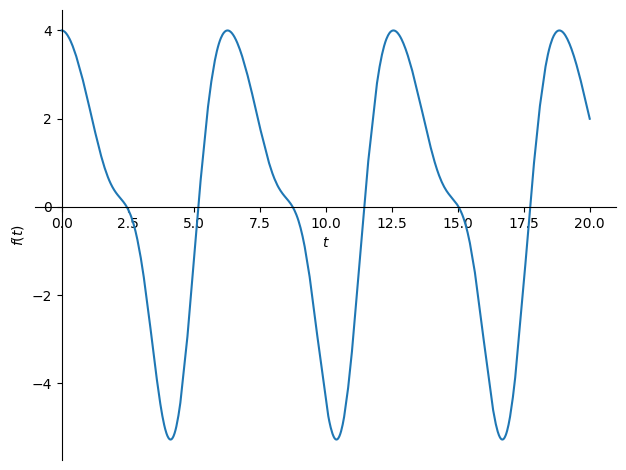

In [23]:
epslist = [0.25,0.1,0.05,0.005]
a = plot(xsol_sub_a0.subs(eps,.4),(t,0,20),show=False)
a.show()

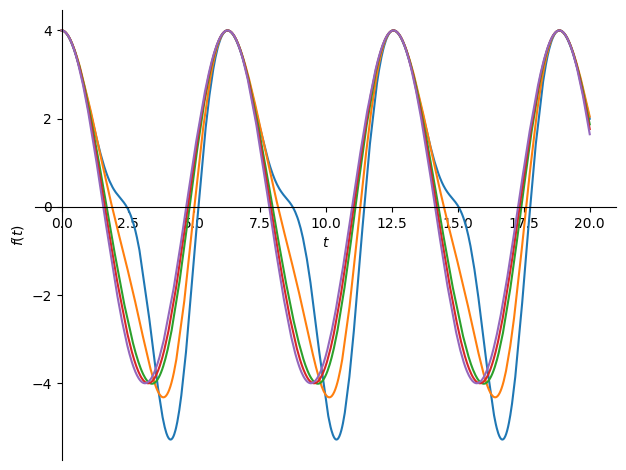

In [24]:
for k in epslist:
    p2 = plot(xsol_sub_a0.subs(eps,k),(t,0,20),show=False)
    a.extend(p2)
a.show()